# 1. Preperation:

1. Brief introduction 
2. Covariance Matrix for different forecasting methods
3. List of portfolio optimization methods

We have list of prediction prices, it is easy to obtain returns dataframe
returns = df.pct_change()

Objective functions(pyportfolioopt)
1. Maximum Sharpe ratio: this results in a tangency portfolio because on a graph of returns vs risk, this portfolio corresponds to the tangent of the efficient frontier that has a y-intercept equal to the risk-free rate. This is the default option because it finds the optimal return per unit risk.
2. Minimum volatility. This may be useful if you're trying to get an idea of how low the volatility could be, but in practice it makes a lot more sense to me to use the portfolio that maximises the Sharpe ratio.
3. Efficient return, a.k.a. the Markowitz portfolio, which minimises risk for a given target return – this was the main focus of Markowitz 1952
4. Efficient risk: the Sharpe-maximising portfolio for a given target risk.
5. Maximum quadratic utility. You can provide your own risk-aversion level and compute the appropriate portfolio.

In [ ]:
!pip install empyrical

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37087 sha256=3f5b149ed4d2729e47778ddca43b07db6a55f83de02d0fdc2d9f00bafb85ff2d
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built empyrical


In [ ]:
!pip install riskfolio-lib

In [ ]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.7MB/s 


In [ ]:
import pandas as pd
import numpy as np
import math
from pandas import ExcelWriter
from pandas import ExcelFile
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.hierarchical_portfolio import HRPOpt
from pypfopt.black_litterman import BlackLittermanModel

In [ ]:
# read in dataset(actual + predictions from different forecasting methods)
actual_whole = pd.read_excel('predictionreturn.xlsx', sheet_name=0,
                     parse_dates=True, index_col="Date")
naive = pd.read_excel('/predictionreturn.xlsx', sheet_name=1,
                     parse_dates=True, index_col="Date")
ES = pd.read_excel('predictionreturn.xlsx', sheet_name=2,
                     parse_dates=True, index_col="Date")
theta = pd.read_excel('predictionreturn.xlsx', sheet_name=3,
                     parse_dates=True, index_col="Date")
KNN = pd.read_excel('predictionreturn.xlsx', sheet_name=4,
                     parse_dates=True, index_col="Date")
RRF = pd.read_excel('predictionreturn.xlsx', sheet_name=5,
                     parse_dates=True, index_col="Date")
TTF = pd.read_excel('predictionreturn.xlsx', sheet_name=6,
                     parse_dates=True, index_col="Date")
VAR = pd.read_excel('predictionreturn.xlsx', sheet_name=7,
                     parse_dates=True, index_col="Date")
ESRNN = pd.read_excel('predictionreturn.xlsx', sheet_name=8,
                     parse_dates=True, index_col="Date")

In [ ]:
 # Set the portfolio construction date: 2020-01-02
# Split the dataframe:
# 1. Historical data from 1996 to 2020-01-02
actual_hist = actual_whole['1996-03-19':'2020-01-02']
# 2. near data from 2020-01-02 to 2020-07-17
actual_near = actual_whole['2020-01-03':]
# 3. foreacasted data from 2015-09-04 to 2020-01-02
naive_return = naive['2015-09-04':'2020-01-02']
ES_return = ES['2015-09-04':'2020-01-02']
theta_return = theta['2015-09-04':'2020-01-02']
KNN_return = KNN['2015-09-04':'2020-01-02']
RRF_return = RRF['2015-09-04':'2020-01-02']
TTF_return = TTF['2015-09-04':'2020-01-02']
VAR_return = VAR['2015-09-04':'2020-01-02']
ESRNN_return = ESRNN['2015-09-04':'2020-01-02']

## 1.1 Baseline portfolio expected return and cov.

In [ ]:
#annualised mean (daily) return for each asset
mu_baseline = expected_returns.mean_historical_return(actual_hist,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_baseline = risk_models.sample_cov(actual_hist,returns_data = True)

## 1.2 Naive portfolio expected return and cov.

In [ ]:
#annualised mean (daily) return for each asset
mu_naive = expected_returns.mean_historical_return(naive_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_naive = risk_models.sample_cov(naive_return,returns_data = True)

## 1.3: ES portfolio expected return and cov.

In [ ]:
#annualised mean (daily) return for each asset
mu_ES = expected_returns.mean_historical_return(ES_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_ES = risk_models.sample_cov(ES_return,returns_data = True)

## 1.4: theta portfolio expected return and cov.

In [ ]:
#annualised mean (daily) return for each asset
mu_theta = expected_returns.mean_historical_return(theta_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_theta = risk_models.sample_cov(theta_return,returns_data = True)

## 1.5: KNN portfolio expected return and cov.

In [ ]:
#annualised mean (daily) return for each asset
mu_KNN = expected_returns.mean_historical_return(KNN_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_KNN= risk_models.sample_cov(KNN_return,returns_data = True)

## 1.6: Random Forest portfolio expected return and cov.

In [ ]:
#annualised mean (daily) return for each asset
mu_RRF = expected_returns.mean_historical_return(RRF_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_RRF = risk_models.sample_cov(RRF_return,returns_data = True)

## 1.7 Pipeline portfolio expected return and cov.

In [ ]:
#annualised mean (daily) return for each asset
mu_TTF= expected_returns.mean_historical_return(TTF_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_TTF = risk_models.sample_cov(TTF_return,returns_data = True)

## 1.8 VAR portfolio expected return and cov.

In [ ]:
#annualised mean (daily) return for each asset
mu_VAR = expected_returns.mean_historical_return(VAR_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_VAR = risk_models.sample_cov(VAR_return,returns_data = True)

## 1.9 ESRNN portfolio expected return and cov.

In [ ]:
#annualised mean (daily) return for each asset
mu_ESRNN = expected_returns.mean_historical_return(ESRNN_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_ESRNN = risk_models.sample_cov(ESRNN_return,returns_data = True)

# 2.  Portfolio Methods: Black Litterman

In [ ]:
from riskfolio import RiskFunctions
from empyrical import stats
# X : pd.Series
def metrics(X,rf):
    # Ratios
    IR = stats.excess_sharpe(X,rf)
    AR = stats.annual_return(X,period = "daily")# mean annual growth rate
    AV = stats.annual_volatility(X, period='daily', alpha=2.0)
    CR = stats.calmar_ratio(X,period = 'daily')
    OR = stats.omega_ratio(X,risk_free=rf,required_return=0.0, annualization=252)
    SR = stats.sharpe_ratio(X,risk_free =rf,period='daily', annualization=None)
    sortino = stats.sortino_ratio(X, required_return=0, period='daily', 
                                  annualization=None, _downside_risk=None)
    tailratio = stats.tail_ratio(X)
    MAD = RiskFunctions.MAD(X)
    VaR = RiskFunctions.VaR_Hist(X,alpha = 0.05)# 95% VaR
    CVaR = RiskFunctions.CVaR_Hist(X,alpha = 0.05)# 95% CVaR
    WR = RiskFunctions.WR(X)# Worst Scenario
    MDD = RiskFunctions.MaxAbsDD(X)# Maximum Drawdown
    metricssheet = pd.DataFrame({
    'Metrics': ['Information Ratio','Annual Return', 'Annual Volatility', 'calmar ratio',
                'omega ratio','sharpe ratio','sortino ratio','tail ratio',
               'Mean Absolute Deviation','Value at Risk','Expected Shortfall',
               'Worst Scenario','maximum drawdown'],
    'values':[IR,AR,AV,CR,OR,SR,sortino,tailratio,MAD,VaR,CVaR,
             WR,MDD]})
    return metricssheet        

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Equal Weights:

In [ ]:
equal_weight = np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_equal_new = pd.Series(np.dot(actual_near, equal_weight))

opt_returns_equal_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_equal_whole = pd.Series(np.dot(actual_whole, equal_weight))

opt_returns_equal_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_equal_hist = pd.Series(np.dot(actual_hist, equal_weight))

opt_returns_equal_hist.index = actual_hist.index

# portfolio 1:
p1_ew = metrics(opt_returns_equal_new,rf = 0.02/252)
# portfolio 2: 
p2_ew = metrics(opt_returns_equal_whole, rf = 0.02/252)
# portfolio 3:
p3_ew = metrics(opt_returns_equal_hist, rf = 0.02/252)

equal_metrics = pd.concat([p1_ew,p2_ew,p3_ew],axis = 1)
equal_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
equal_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.011277,Information Ratio,0.023168,Information Ratio,0.024139
1,Annual Return,0.008691,Annual Return,0.074986,Annual Return,0.076541
2,Annual Volatility,0.412686,Annual Volatility,0.192826,Annual Volatility,0.184897
3,calmar ratio,0.027285,calmar ratio,0.141179,calmar ratio,0.144107
4,omega ratio,1.035433,omega ratio,1.070751,omega ratio,1.072461
5,sharpe ratio,0.179024,sharpe ratio,0.367778,sharpe ratio,0.383187
6,sortino ratio,0.313227,sortino ratio,0.670225,sortino ratio,0.701354
7,tail ratio,0.946923,tail ratio,0.948165,tail ratio,0.956660
8,Mean Absolute Deviation,0.016803,Mean Absolute Deviation,0.008221,Mean Absolute Deviation,0.008026
9,Value at Risk,0.043948,Value at Risk,0.018707,Value at Risk,0.018407


## 2.1: Baseline Portfolio:

### 2.1.1 Baseline compute optimal weights:

In [ ]:
# Fit the Blacklitterman Optimizer, and Output optimal weights

viewdict = dict(mu_baseline)
bl_baseline = BlackLittermanModel(S_baseline, absolute_views=viewdict, pi="equal", omega="default")
weights_baseline = bl_baseline.bl_weights()
clean_weights = bl_baseline.clean_weights()
print(clean_weights)

OrderedDict([('Russeltop200', 0.94872), ('MSCIJapan', 0.04607), ('SP500IT', -0.26328), ('SP500HealthCare', 0.48821), ('SP500Industrial', -0.21972)])


In [ ]:
# Optimal weights for baseline portfolio:
opt_weights_baseline = np.array(list(clean_weights.values()))
print(opt_weights_baseline)

[ 0.94872  0.04607 -0.26328  0.48821 -0.21972]


### 2.1.2: Baseline compute metrics in 3 different timelines:

In [ ]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_baseline_new = pd.Series(np.dot(actual_near, opt_weights_baseline))

opt_returns_baseline_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_baseline_whole = pd.Series(np.dot(actual_whole, opt_weights_baseline))

opt_returns_baseline_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_baseline_hist = pd.Series(np.dot(actual_hist, opt_weights_baseline))

opt_returns_baseline_hist.index = actual_hist.index

In [ ]:
# portfolio 1:
p1_baseline = metrics(opt_returns_baseline_new,rf = 0.02/252)
# portfolio 2: 
p2_baseline = metrics(opt_returns_baseline_whole, rf = 0.02/252)
# portfolio 3:
p3_baseline = metrics(opt_returns_baseline_hist, rf = 0.02/252)

baseline_metrics = pd.concat([p1_baseline,p2_baseline,p3_baseline],axis = 1)
baseline_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
baseline_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.018835,Information Ratio,0.025744,Information Ratio,0.026499
1,Annual Return,0.063001,Annual Return,0.080455,Annual Return,0.080855
2,Annual Volatility,0.384897,Annual Volatility,0.180199,Annual Volatility,0.172826
3,calmar ratio,0.225139,calmar ratio,0.175741,calmar ratio,0.176614
4,omega ratio,1.060238,omega ratio,1.079364,omega ratio,1.080280
5,sharpe ratio,0.298995,sharpe ratio,0.408670,sharpe ratio,0.420658
6,sortino ratio,0.492473,sortino ratio,0.738723,sortino ratio,0.763936
7,tail ratio,1.140079,tail ratio,0.976797,tail ratio,0.982949
8,Mean Absolute Deviation,0.015587,Mean Absolute Deviation,0.007643,Mean Absolute Deviation,0.007462
9,Value at Risk,0.038679,Value at Risk,0.016730,Value at Risk,0.016421


## 2.2: Enhanced Portfolio: Naive Forecaster:

### 2.2.1: Naive compute optimal weights:

In [ ]:
# Fit the Blacklitterman Optimizer, and Output optimal weights

viewdict = dict(mu_naive)
bl_naive = BlackLittermanModel(S_naive, absolute_views=viewdict, pi="equal", omega="default")
weights_naive = bl_naive.bl_weights()
clean_weights = bl_naive.clean_weights()
print(clean_weights)
bl_naive.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.54277), ('MSCIJapan', 0.18104), ('SP500IT', -0.02268), ('SP500HealthCare', 0.15494), ('SP500Industrial', 0.14394)])
Expected annual return: 99.1%
Annual volatility: 15.5%
Sharpe Ratio: 6.28


(0.9913528578703475, 0.15458326522616236, 6.283687024266269)

In [ ]:
# Optimal weights for portfolio:
opt_weights_naive = np.array(list(clean_weights.values()))
print(opt_weights_naive)

[ 0.54277  0.18104 -0.02268  0.15494  0.14394]


### 2.2.2：Naive compute metrics in 3 different timelines

In [ ]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_naive_new = pd.Series(np.dot(actual_near, opt_weights_naive))

opt_returns_naive_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_naive_whole = pd.Series(np.dot(actual_whole, opt_weights_naive))

opt_returns_naive_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_naive_hist = pd.Series(np.dot(actual_hist, opt_weights_naive))

opt_returns_naive_hist.index = actual_hist.index

# portfolio 1:
p1_naive = metrics(opt_returns_naive_new,rf = 0.02/252)
# portfolio 2: 
p2_naive = metrics(opt_returns_naive_whole, rf = 0.02/252)
# portfolio 3:
p3_naive = metrics(opt_returns_naive_hist, rf = 0.02/252)

naive_metrics = pd.concat([p1_naive,p2_naive,p3_naive],axis = 1)
naive_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
naive_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.006539,Information Ratio,0.022160,Information Ratio,0.023366
1,Annual Return,-0.019882,Annual Return,0.070172,Annual Return,0.072311
2,Annual Volatility,0.404957,Annual Volatility,0.184282,Annual Volatility,0.176165
3,calmar ratio,-0.062220,calmar ratio,0.131315,calmar ratio,0.135316
4,omega ratio,1.020384,omega ratio,1.068426,omega ratio,1.070866
5,sharpe ratio,0.103807,sharpe ratio,0.351780,sharpe ratio,0.370927
6,sortino ratio,0.209558,sortino ratio,0.650740,sortino ratio,0.687992
7,tail ratio,0.953251,tail ratio,0.956254,tail ratio,0.968031
8,Mean Absolute Deviation,0.016517,Mean Absolute Deviation,0.007762,Mean Absolute Deviation,0.007564
9,Value at Risk,0.043711,Value at Risk,0.017618,Value at Risk,0.017150


## 2.3: Enhanced Portfolio: Exponential Smoothing

In [ ]:
# Fit the Blacklitterman Optimizer, and Output optimal weights

viewdict = dict(mu_ES)
bl_ES = BlackLittermanModel(S_ES, absolute_views=viewdict, pi="equal", omega="default")
weights_ES = bl_ES.bl_weights()
clean_weights = bl_ES.clean_weights()
print(clean_weights)
bl_ES.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.3286), ('MSCIJapan', 0.14262), ('SP500IT', 0.0197), ('SP500HealthCare', 0.34049), ('SP500Industrial', 0.1686)])
Expected annual return: 82.8%
Annual volatility: 6.8%
Sharpe Ratio: 11.80


(0.8280292793852815, 0.06845125905408958, 11.804447289227856)

In [ ]:
# Optimal weights for portfolio:
opt_weights_ES = np.array(list(clean_weights.values()))
print(opt_weights_ES)

[0.3286  0.14262 0.0197  0.34049 0.1686 ]


In [ ]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_ES_new = pd.Series(np.dot(actual_near, opt_weights_ES))

opt_returns_ES_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_ES_whole = pd.Series(np.dot(actual_whole, opt_weights_ES))

opt_returns_ES_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_ES_hist = pd.Series(np.dot(actual_hist, opt_weights_ES))

opt_returns_ES_hist.index = actual_hist.index

# portfolio 1:
p1_ES = metrics(opt_returns_ES_new,rf = 0.02/252)
# portfolio 2: 
p2_ES = metrics(opt_returns_ES_whole, rf = 0.02/252)
# portfolio 3:
p3_ES = metrics(opt_returns_ES_hist, rf = 0.02/252)

ES_metrics = pd.concat([p1_ES,p2_ES,p3_ES],axis = 1)
ES_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
ES_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.008200,Information Ratio,0.023923,Information Ratio,0.025187
1,Annual Return,-0.008666,Annual Return,0.075175,Annual Return,0.077159
2,Annual Volatility,0.402717,Annual Volatility,0.181778,Annual Volatility,0.173601
3,calmar ratio,-0.027334,calmar ratio,0.146570,calmar ratio,0.150439
4,omega ratio,1.025547,omega ratio,1.073488,omega ratio,1.075932
5,sharpe ratio,0.130173,sharpe ratio,0.379766,sharpe ratio,0.399827
6,sortino ratio,0.247664,sortino ratio,0.692756,sortino ratio,0.731235
7,tail ratio,1.020271,tail ratio,0.979538,tail ratio,0.996301
8,Mean Absolute Deviation,0.016479,Mean Absolute Deviation,0.007715,Mean Absolute Deviation,0.007517
9,Value at Risk,0.042869,Value at Risk,0.017162,Value at Risk,0.016640


## 2.4 Enhanced Portfolio: Theta Forecaster

In [ ]:
# Fit the Blacklitterman Optimizer, and Output optimal weights

viewdict = dict(mu_theta)
bl_theta = BlackLittermanModel(S_theta, absolute_views=viewdict, pi="equal", omega="default")
weights_theta = bl_theta.bl_weights()
clean_weights = bl_theta.clean_weights()
print(clean_weights)
bl_theta.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.2926), ('MSCIJapan', 0.15095), ('SP500IT', 0.04193), ('SP500HealthCare', 0.33142), ('SP500Industrial', 0.18309)])
Expected annual return: 111.4%
Annual volatility: 7.8%
Sharpe Ratio: 14.09


(1.1141568501492685, 0.07762853423399887, 14.094776630086903)

In [ ]:
# Optimal weights for portfolio:
opt_weights_theta = np.array(list(clean_weights.values()))
print(opt_weights_theta)

[0.2926  0.15095 0.04193 0.33142 0.18309]


In [ ]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_theta_new = pd.Series(np.dot(actual_near, opt_weights_theta))

opt_returns_theta_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_theta_whole = pd.Series(np.dot(actual_whole, opt_weights_theta))

opt_returns_theta_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_theta_hist = pd.Series(np.dot(actual_hist, opt_weights_theta))

opt_returns_theta_hist.index = actual_hist.index

# portfolio 1:
p1_theta = metrics(opt_returns_theta_new,rf = 0.02/252)
# portfolio 2: 
p2_theta = metrics(opt_returns_theta_whole, rf = 0.02/252)
# portfolio 3:
p3_theta = metrics(opt_returns_theta_hist, rf = 0.02/252)

theta_metrics = pd.concat([p1_theta,p2_theta,p3_theta],axis = 1)
theta_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
theta_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.008083,Information Ratio,0.023786,Information Ratio,0.025040
1,Annual Return,-0.009666,Annual Return,0.074922,Annual Return,0.076925
2,Annual Volatility,0.403667,Annual Volatility,0.182599,Annual Volatility,0.174430
3,calmar ratio,-0.030399,calmar ratio,0.145380,calmar ratio,0.149265
4,omega ratio,1.025180,omega ratio,1.072995,omega ratio,1.075425
5,sharpe ratio,0.128320,sharpe ratio,0.377587,sharpe ratio,0.397502
6,sortino ratio,0.244903,sortino ratio,0.689154,sortino ratio,0.727376
7,tail ratio,1.012320,tail ratio,0.979652,tail ratio,0.993990
8,Mean Absolute Deviation,0.016516,Mean Absolute Deviation,0.007757,Mean Absolute Deviation,0.007558
9,Value at Risk,0.043063,Value at Risk,0.017279,Value at Risk,0.016792


## 2.5: Enhanced Portfolio: KNN

In [ ]:
# Fit the Blacklitterman Optimizer, and Output optimal weights

viewdict = dict(mu_KNN)
bl_KNN = BlackLittermanModel(S_KNN, absolute_views=viewdict, pi="equal", omega="default")
weights_KNN = bl_KNN.bl_weights()
clean_weights = bl_KNN.clean_weights()
print(clean_weights)
bl_KNN.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.21831), ('MSCIJapan', 0.25654), ('SP500IT', 0.05491), ('SP500HealthCare', 0.22111), ('SP500Industrial', 0.24913)])
Expected annual return: -76.7%
Annual volatility: 9.7%
Sharpe Ratio: -8.13


(-0.7666147017353478, 0.09673931343560498, -8.13128265851258)

In [ ]:
# Optimal weights for portfolio:
opt_weights_KNN = np.array(list(clean_weights.values()))
print(opt_weights_KNN)

[0.21831 0.25654 0.05491 0.22111 0.24913]


In [ ]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_KNN_new = pd.Series(np.dot(actual_near, opt_weights_KNN))

opt_returns_KNN_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_KNN_whole = pd.Series(np.dot(actual_whole, opt_weights_KNN))

opt_returns_KNN_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_KNN_hist = pd.Series(np.dot(actual_hist, opt_weights_KNN))

opt_returns_KNN_hist.index = actual_hist.index

# portfolio 1:
p1_KNN = metrics(opt_returns_KNN_new,rf = 0.02/252)
# portfolio 2: 
p2_KNN = metrics(opt_returns_KNN_whole, rf = 0.02/252)
# portfolio 3:
p3_KNN = metrics(opt_returns_KNN_hist, rf = 0.02/252)

KNN_metrics = pd.concat([p1_KNN,p2_KNN,p3_KNN],axis = 1)
KNN_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
KNN_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.002256,Information Ratio,0.020314,Information Ratio,0.021564
1,Annual Return,-0.044379,Annual Return,0.064592,Annual Return,0.067206
2,Annual Volatility,0.398984,Annual Volatility,0.185484,Annual Volatility,0.177755
3,calmar ratio,-0.137931,calmar ratio,0.120566,calmar ratio,0.125445
4,omega ratio,1.006956,omega ratio,1.061746,omega ratio,1.064453
5,sharpe ratio,0.035807,sharpe ratio,0.322478,sharpe ratio,0.342317
6,sortino ratio,0.117489,sortino ratio,0.608703,sortino ratio,0.646280
7,tail ratio,0.904831,tail ratio,0.969456,tail ratio,0.959688
8,Mean Absolute Deviation,0.016352,Mean Absolute Deviation,0.007914,Mean Absolute Deviation,0.007722
9,Value at Risk,0.043581,Value at Risk,0.017608,Value at Risk,0.017225


## 2.6 Enhanced Portfolio: Random Forest:

In [ ]:
# Fit the Blacklitterman Optimizer, and Output optimal weights

viewdict = dict(mu_RRF)
bl_RRF = BlackLittermanModel(S_RRF, absolute_views=viewdict, pi="equal", omega="default")
weights_RRF = bl_RRF.bl_weights()
clean_weights = bl_RRF.clean_weights()
print(clean_weights)
bl_RRF.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', -1.69867), ('MSCIJapan', 1.62223), ('SP500IT', 2.76575), ('SP500HealthCare', -1.17737), ('SP500Industrial', -0.51194)])
Expected annual return: 139.4%
Annual volatility: 10.6%
Sharpe Ratio: 12.91


(1.3936245748949767, 0.10640470509890768, 12.909434536923293)

In [ ]:
# Optimal weights for portfolio:
opt_weights_RRF = np.array(list(clean_weights.values()))
print(opt_weights_RRF)

[-1.69867  1.62223  2.76575 -1.17737 -0.51194]


In [ ]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_RRF_new = pd.Series(np.dot(actual_near, opt_weights_RRF))

opt_returns_RRF_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_RRF_whole = pd.Series(np.dot(actual_whole, opt_weights_RRF))

opt_returns_RRF_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_RRF_hist = pd.Series(np.dot(actual_hist, opt_weights_RRF))

opt_returns_RRF_hist.index = actual_hist.index

# portfolio 1:
p1_RRF = metrics(opt_returns_RRF_new,rf = 0.02/252)
# portfolio 2: 
p2_RRF = metrics(opt_returns_RRF_whole, rf = 0.02/252)
# portfolio 3:
p3_RRF = metrics(opt_returns_RRF_hist, rf = 0.02/252)

RRF_metrics = pd.concat([p1_RRF,p2_RRF,p3_RRF],axis = 1)
RRF_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
RRF_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.060173,Information Ratio,0.007353,Information Ratio,0.006241
1,Annual Return,0.511522,Annual Return,-0.105342,Annual Return,-0.115933
2,Annual Volatility,0.597459,Annual Volatility,0.643285,Annual Volatility,0.644316
3,calmar ratio,1.569361,calmar ratio,-0.105617,calmar ratio,-0.116236
4,omega ratio,1.175546,omega ratio,1.021944,omega ratio,1.018634
5,sharpe ratio,0.955212,sharpe ratio,0.116721,sharpe ratio,0.099067
6,sortino ratio,1.485537,sortino ratio,0.212502,sortino ratio,0.186903
7,tail ratio,1.254711,tail ratio,0.932695,tail ratio,0.927718
8,Mean Absolute Deviation,0.028067,Mean Absolute Deviation,0.027448,Mean Absolute Deviation,0.027434
9,Value at Risk,0.057130,Value at Risk,0.064862,Value at Risk,0.065142


## 2.7: Enhanced Portfolio: Pipeline Model:

In [ ]:
# Fit the Blacklitterman Optimizer, and Output optimal weights

viewdict = dict(mu_TTF)
bl_TTF = BlackLittermanModel(S_TTF, absolute_views=viewdict, pi="equal", omega="default")
weights_TTF = bl_TTF.bl_weights()
clean_weights = bl_TTF.clean_weights()
print(clean_weights)
bl_TTF.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.2383), ('MSCIJapan', 0.12775), ('SP500IT', 0.24037), ('SP500HealthCare', 0.2616), ('SP500Industrial', 0.13198)])
Expected annual return: 155.7%
Annual volatility: 13.0%
Sharpe Ratio: 11.78


(1.5567416626604365, 0.13043721558252083, 11.781466323069585)

In [ ]:
# Optimal weights for portfolio:
opt_weights_TTF = np.array(list(clean_weights.values()))
print(opt_weights_TTF)

[0.2383  0.12775 0.24037 0.2616  0.13198]


In [ ]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_TTF_new = pd.Series(np.dot(actual_near, opt_weights_TTF))

opt_returns_TTF_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_TTF_whole = pd.Series(np.dot(actual_whole, opt_weights_TTF))

opt_returns_TTF_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_TTF_hist = pd.Series(np.dot(actual_hist, opt_weights_TTF))

opt_returns_TTF_hist.index = actual_hist.index

# portfolio 1:
p1_TTF = metrics(opt_returns_TTF_new,rf = 0.02/252)
# portfolio 2: 
p2_TTF = metrics(opt_returns_TTF_whole, rf = 0.02/252)
# portfolio 3:
p3_TTF = metrics(opt_returns_TTF_hist, rf = 0.02/252)

TTF_metrics = pd.concat([p1_TTF,p2_TTF,p3_TTF],axis = 1)
TTF_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
TTF_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.017660,Information Ratio,0.025838,Information Ratio,0.026681
1,Annual Return,0.050917,Annual Return,0.084078,Annual Return,0.084843
2,Annual Volatility,0.418869,Annual Volatility,0.193993,Annual Volatility,0.185829
3,calmar ratio,0.162648,calmar ratio,0.157048,calmar ratio,0.158477
4,omega ratio,1.056211,omega ratio,1.079304,omega ratio,1.080423
5,sharpe ratio,0.280338,sharpe ratio,0.410161,sharpe ratio,0.423555
6,sortino ratio,0.455050,sortino ratio,0.731038,sortino ratio,0.759276
7,tail ratio,1.027627,tail ratio,0.952417,tail ratio,0.952178
8,Mean Absolute Deviation,0.016986,Mean Absolute Deviation,0.008261,Mean Absolute Deviation,0.008063
9,Value at Risk,0.043304,Value at Risk,0.018968,Value at Risk,0.018568


## 2.8: Enhanced Portfolio: VAR

In [ ]:
# Fit the Blacklitterman Optimizer, and Output optimal weights

viewdict = dict(mu_VAR)
bl_VAR = BlackLittermanModel(S_VAR, absolute_views=viewdict, pi="equal", omega="default")
weights_VAR = bl_VAR.bl_weights()
clean_weights = bl_VAR.clean_weights()
print(clean_weights)
bl_VAR.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', -14.34997), ('MSCIJapan', 5.58269), ('SP500IT', 3.59903), ('SP500HealthCare', -0.66409), ('SP500Industrial', 6.83233)])
Expected annual return: 41.2%
Annual volatility: 3.3%
Sharpe Ratio: 11.86


(0.41194294372008056, 0.03303772289233586, 11.863497523644524)

In [ ]:
# Optimal weights for portfolio:
opt_weights_VAR = np.array(list(clean_weights.values()))
print(opt_weights_VAR)

[-14.34997   5.58269   3.59903  -0.66409   6.83233]


In [ ]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_VAR_new = pd.Series(np.dot(actual_near, opt_weights_VAR))

opt_returns_VAR_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_VAR_whole = pd.Series(np.dot(actual_whole, opt_weights_VAR))

opt_returns_VAR_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_VAR_hist = pd.Series(np.dot(actual_hist, opt_weights_VAR))

opt_returns_VAR_hist.index = actual_hist.index

# portfolio 1:
p1_VAR = metrics(opt_returns_VAR_new,rf = 0.02/252)
# portfolio 2: 
p2_VAR = metrics(opt_returns_VAR_whole, rf = 0.02/252)
# portfolio 3:
p3_VAR = metrics(opt_returns_VAR_hist, rf = 0.02/252)

VAR_metrics = pd.concat([p1_VAR,p2_VAR,p3_VAR],axis = 1)
VAR_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
VAR_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,-0.082183,Information Ratio,-0.017158,Information Ratio,-0.015300
1,Annual Return,-0.968309,Annual Return,-0.694146,Annual Return,-0.677988
2,Annual Volatility,1.635959,Annual Volatility,1.299345,Annual Volatility,1.290741
3,calmar ratio,-1.091443,calmar ratio,-0.694146,calmar ratio,-0.677988
4,omega ratio,0.800265,omega ratio,0.953057,omega ratio,0.958022
5,sharpe ratio,-1.304610,sharpe ratio,-0.272383,sharpe ratio,-0.242876
6,sortino ratio,-1.828837,sortino ratio,-0.366192,sortino ratio,-0.324098
7,tail ratio,0.880904,tail ratio,1.025796,tail ratio,1.028376
8,Mean Absolute Deviation,0.075874,Mean Absolute Deviation,0.058417,Mean Absolute Deviation,0.058012
9,Value at Risk,0.175762,Value at Risk,0.127311,Value at Risk,0.126860


## 2.9 Enhanced Portfolio: ESRNN

In [ ]:
# Fit the Blacklitterman Optimizer, and Output optimal weights

viewdict = dict(mu_ESRNN)
bl_ESRNN = BlackLittermanModel(S_ESRNN, absolute_views=viewdict, pi="equal", omega="default")
weights_ESRNN = bl_ESRNN.bl_weights()
clean_weights = bl_ESRNN.clean_weights()
print(clean_weights)
bl_ESRNN.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.38492), ('MSCIJapan', 0.41199), ('SP500IT', -0.59237), ('SP500HealthCare', -0.09953), ('SP500Industrial', 0.895)])
Expected annual return: 93.8%
Annual volatility: 24.0%
Sharpe Ratio: 3.83


(0.938074703307306, 0.23964403491744604, 3.8309933465423818)

In [ ]:
# Optimal weights for portfolio:
opt_weights_ESRNN = np.array(list(clean_weights.values()))
print(opt_weights_ESRNN)

[ 0.38492  0.41199 -0.59237 -0.09953  0.895  ]


In [ ]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_ESRNN_new = pd.Series(np.dot(actual_near, opt_weights_ESRNN))

opt_returns_ESRNN_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_ESRNN_whole = pd.Series(np.dot(actual_whole, opt_weights_ESRNN))

opt_returns_ESRNN_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_ESRNN_hist = pd.Series(np.dot(actual_hist, opt_weights_ESRNN))

opt_returns_ESRNN_hist.index = actual_hist.index

# portfolio 1:
p1_ESRNN = metrics(opt_returns_ESRNN_new,rf = 0.02/252)
# portfolio 2: 
p2_ESRNN = metrics(opt_returns_ESRNN_whole, rf = 0.02/252)
# portfolio 3:
p3_ESRNN = metrics(opt_returns_ESRNN_hist, rf = 0.02/252)

ESRNN_metrics = pd.concat([p1_ESRNN,p2_ESRNN,p3_ESRNN],axis = 1)
ESRNN_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
ESRNN_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,-0.049334,Information Ratio,0.002538,Information Ratio,0.005082
1,Annual Return,-0.347690,Annual Return,0.005220,Annual Return,0.015140
2,Annual Volatility,0.444683,Annual Volatility,0.216689,Annual Volatility,0.208688
3,calmar ratio,-0.841986,calmar ratio,0.007966,calmar ratio,0.023104
4,omega ratio,0.866324,omega ratio,1.007291,omega ratio,1.014447
5,sharpe ratio,-0.783154,sharpe ratio,0.040287,sharpe ratio,0.080677
6,sortino ratio,-1.006722,sortino ratio,0.184797,sortino ratio,0.246649
7,tail ratio,0.981969,tail ratio,0.928977,tail ratio,0.936675
8,Mean Absolute Deviation,0.019229,Mean Absolute Deviation,0.009536,Mean Absolute Deviation,0.009313
9,Value at Risk,0.045587,Value at Risk,0.021123,Value at Risk,0.020514


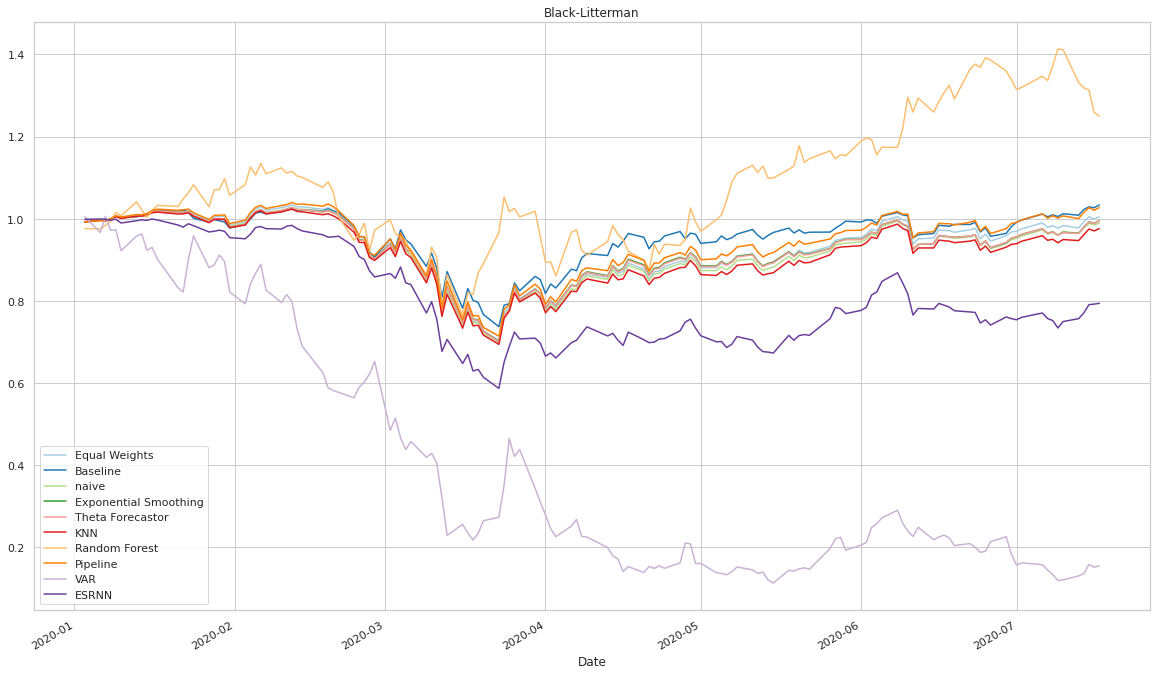

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_palette("Paired")
sns.set_style("whitegrid")

opt_returns_equal_new.name = "Equal Weights"
opt_returns_baseline_new.name = "Baseline"
opt_returns_naive_new.name = "naive"
opt_returns_ES_new.name = "Exponential Smoothing"
opt_returns_theta_new.name = "Theta Forecastor"
opt_returns_KNN_new.name = "KNN"
opt_returns_RRF_new.name = "Random Forest"
opt_returns_TTF_new.name = "Pipeline"
opt_returns_VAR_new.name = "VAR"
opt_returns_ESRNN_new.name = "ESRNN"

returns_full = pd.concat((opt_returns_equal_new, opt_returns_baseline_new,opt_returns_naive_new, 
                          opt_returns_ES_new, opt_returns_theta_new, opt_returns_KNN_new, opt_returns_RRF_new,
                          opt_returns_TTF_new, opt_returns_VAR_new,opt_returns_ESRNN_new),axis=1)
((returns_full+1).cumprod()).plot(figsize=(20, 12), title="Black-Litterman")
plt.savefig('BLM.png')

In [ ]:
#new
p1_ew['values'].rename('Equal Weights', inplace=True)
p1_baseline['values'].rename('Baseline', inplace=True)
p1_naive['values'].rename('Naive', inplace=True)
p1_ES['values'].rename('ES', inplace=True)
p1_theta['values'].rename('Theta', inplace=True)
p1_KNN['values'].rename('KNN', inplace=True)
p1_RRF['values'].rename('Random Forest', inplace=True)
p1_TTF['values'].rename('Pipeline', inplace=True)
p1_VAR['values'].rename('VAR', inplace=True)
p1_ESRNN['values'].rename('ESRNN', inplace=True)

metrics = pd.concat([p1_ew['Metrics'], p1_ew['values'], p1_baseline['values'], p1_naive['values'], 
                     p1_ES['values'], p1_theta['values'], p1_KNN['values'], 
                     p1_RRF['values'], p1_TTF['values'], p1_VAR['values'], p1_ESRNN['values']],axis = 1)
metrics
#metrics.to_latex(index=False)

,Metrics,Equal Weights,Baseline,Naive,ES,Theta,KNN,Random Forest,Pipeline,VAR,ESRNN
0,Information Ratio,0.011277,0.018835,0.006539,0.008200,0.008083,0.002256,0.060173,0.017660,-0.082183,-0.049334
1,Annual Return,0.008691,0.063001,-0.019882,-0.008666,-0.009666,-0.044379,0.511522,0.050917,-0.968309,-0.347690
2,Annual Volatility,0.412686,0.384897,0.404957,0.402717,0.403667,0.398984,0.597459,0.418869,1.635959,0.444683
3,calmar ratio,0.027285,0.225139,-0.062220,-0.027334,-0.030399,-0.137931,1.569361,0.162648,-1.091443,-0.841986
4,omega ratio,1.035433,1.060238,1.020384,1.025547,1.025180,1.006956,1.175546,1.056211,0.800265,0.866324
5,sharpe ratio,0.179024,0.298995,0.103807,0.130173,0.128320,0.035807,0.955212,0.280338,-1.304610,-0.783154
6,sortino ratio,0.313227,0.492473,0.209558,0.247664,0.244903,0.117489,1.485537,0.455050,-1.828837,-1.006722
7,tail ratio,0.946923,1.140079,0.953251,1.020271,1.012320,0.904831,1.254711,1.027627,0.880904,0.981969
8,Mean Absolute Deviation,0.016803,0.015587,0.016517,0.016479,0.016516,0.016352,0.028067,0.016986,0.075874,0.019229
9,Value at Risk,0.043948,0.038679,0.043711,0.042869,0.043063,0.043581,0.057130,0.043304,0.175762,0.045587


In [ ]:
#whole
p2_ew['values'].rename('Equal Weights', inplace=True)
p2_baseline['values'].rename('Baseline', inplace=True)
p2_naive['values'].rename('Naive', inplace=True)
p2_ES['values'].rename('ES', inplace=True)
p2_theta['values'].rename('Theta', inplace=True)
p2_KNN['values'].rename('KNN', inplace=True)
p2_RRF['values'].rename('Random Forest', inplace=True)
p2_TTF['values'].rename('Pipeline', inplace=True)
p2_VAR['values'].rename('VAR', inplace=True)
p2_ESRNN['values'].rename('ESRNN', inplace=True)

metrics = pd.concat([p2_ew['Metrics'], p2_ew['values'], p2_baseline['values'], p2_naive['values'], 
                     p2_ES['values'], p2_theta['values'], p2_KNN['values'], 
                     p2_RRF['values'], p2_TTF['values'], p2_VAR['values'], p2_ESRNN['values']],axis = 1)
metrics
#metrics.to_latex(index=False)

,Metrics,Equal Weights,Baseline,Naive,ES,Theta,KNN,Random Forest,Pipeline,VAR,ESRNN
0,Information Ratio,0.023168,0.025744,0.022160,0.023923,0.023786,0.020314,0.007353,0.025838,-0.017158,0.002538
1,Annual Return,0.074986,0.080455,0.070172,0.075175,0.074922,0.064592,-0.105342,0.084078,-0.694146,0.005220
2,Annual Volatility,0.192826,0.180199,0.184282,0.181778,0.182599,0.185484,0.643285,0.193993,1.299345,0.216689
3,calmar ratio,0.141179,0.175741,0.131315,0.146570,0.145380,0.120566,-0.105617,0.157048,-0.694146,0.007966
4,omega ratio,1.070751,1.079364,1.068426,1.073488,1.072995,1.061746,1.021944,1.079304,0.953057,1.007291
5,sharpe ratio,0.367778,0.408670,0.351780,0.379766,0.377587,0.322478,0.116721,0.410161,-0.272383,0.040287
6,sortino ratio,0.670225,0.738723,0.650740,0.692756,0.689154,0.608703,0.212502,0.731038,-0.366192,0.184797
7,tail ratio,0.948165,0.976797,0.956254,0.979538,0.979652,0.969456,0.932695,0.952417,1.025796,0.928977
8,Mean Absolute Deviation,0.008221,0.007643,0.007762,0.007715,0.007757,0.007914,0.027448,0.008261,0.058417,0.009536
9,Value at Risk,0.018707,0.016730,0.017618,0.017162,0.017279,0.017608,0.064862,0.018968,0.127311,0.021123


In [ ]:
#hist
p3_ew['values'].rename('Equal Weights', inplace=True)
p3_baseline['values'].rename('Baseline', inplace=True)
p3_naive['values'].rename('Naive', inplace=True)
p3_ES['values'].rename('ES', inplace=True)
p3_theta['values'].rename('Theta', inplace=True)
p3_KNN['values'].rename('KNN', inplace=True)
p3_RRF['values'].rename('Random Forest', inplace=True)
p3_TTF['values'].rename('Pipeline', inplace=True)
p3_VAR['values'].rename('VAR', inplace=True)
p3_ESRNN['values'].rename('ESRNN', inplace=True)

metrics = pd.concat([p3_ew['Metrics'], p3_ew['values'], p3_baseline['values'], p3_naive['values'], 
                     p3_ES['values'], p3_theta['values'], p3_KNN['values'], 
                     p3_RRF['values'], p3_TTF['values'], p3_VAR['values'], p3_ESRNN['values']],axis = 1)
metrics
#metrics.to_latex(index=False)

,Metrics,Equal Weights,Baseline,Naive,ES,Theta,KNN,Random Forest,Pipeline,VAR,ESRNN
0,Information Ratio,0.024139,0.026499,0.023366,0.025187,0.025040,0.021564,0.006241,0.026681,-0.015300,0.005082
1,Annual Return,0.076541,0.080855,0.072311,0.077159,0.076925,0.067206,-0.115933,0.084843,-0.677988,0.015140
2,Annual Volatility,0.184897,0.172826,0.176165,0.173601,0.174430,0.177755,0.644316,0.185829,1.290741,0.208688
3,calmar ratio,0.144107,0.176614,0.135316,0.150439,0.149265,0.125445,-0.116236,0.158477,-0.677988,0.023104
4,omega ratio,1.072461,1.080280,1.070866,1.075932,1.075425,1.064453,1.018634,1.080423,0.958022,1.014447
5,sharpe ratio,0.383187,0.420658,0.370927,0.399827,0.397502,0.342317,0.099067,0.423555,-0.242876,0.080677
6,sortino ratio,0.701354,0.763936,0.687992,0.731235,0.727376,0.646280,0.186903,0.759276,-0.324098,0.246649
7,tail ratio,0.956660,0.982949,0.968031,0.996301,0.993990,0.959688,0.927718,0.952178,1.028376,0.936675
8,Mean Absolute Deviation,0.008026,0.007462,0.007564,0.007517,0.007558,0.007722,0.027434,0.008063,0.058012,0.009313
9,Value at Risk,0.018407,0.016421,0.017150,0.016640,0.016792,0.017225,0.065142,0.018568,0.126860,0.020514
